# Importer les librairies

In [19]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Importer les données

In [8]:
data = pd.read_csv("Data/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` et `Pclass` avec l'argument `drop_first=True`.

In [9]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    
    """La fonction prépare les données à l'analyse.
    
    Args:
        data (pd.DataFrame): La dataframe originale
        
    Returns:
        pd.DataFrame: La dataframe preprocessée et prête à être analysée.
    """
    # Faire une copie de la dataframe originale
    data_preprocessed = data.copy()
    
    # Supprimer les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
    
    # Supprimer les lignes contenant au moins une valeur manquante
    data_preprocessed = data_preprocessed.dropna(axis=0) 

    # Créer une variable `FamilySize` et supprimer les variables `SibSp` et `Parch`
    data_preprocessed['FamilySize'] = data_preprocessed['SibSp'] + data_preprocessed['Parch'] + 1
    data_preprocessed.drop(['SibSp', 'Parch'], axis=1, inplace=True)
    
    # Recalculer le prix du billet
    data_preprocessed['Fare'] = data_preprocessed['Fare'] / data_preprocessed['FamilySize'].where(data_preprocessed['FamilySize'] != 0, 1)
    
    # One-hot encoding de `Sex`, `Embarked` et `Pclass`
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

    

    
    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."

    
    return data_preprocessed


Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [10]:
# Preprocess les données à l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,1,0,1
1,1,1,38.0,35.641650,2,0,0,0
2,1,3,26.0,7.925000,1,0,0,1
3,1,1,35.0,26.550000,2,0,0,1
4,0,3,35.0,8.050000,1,1,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,4.854167,6,0,1,0
886,0,2,27.0,13.000000,1,1,0,1
887,1,1,19.0,30.000000,1,0,0,1
889,1,1,26.0,30.000000,1,1,0,0


## 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il le même que l'âge moyen de la population en 1912 (28 ans)?**

1. La variable d'intérêt est l'âge des passagers, c'est une variable de type quantitative.
2. Nous avons donc décidé d'utiliser un histogramme afin de la visualiser

/home/guillaume/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


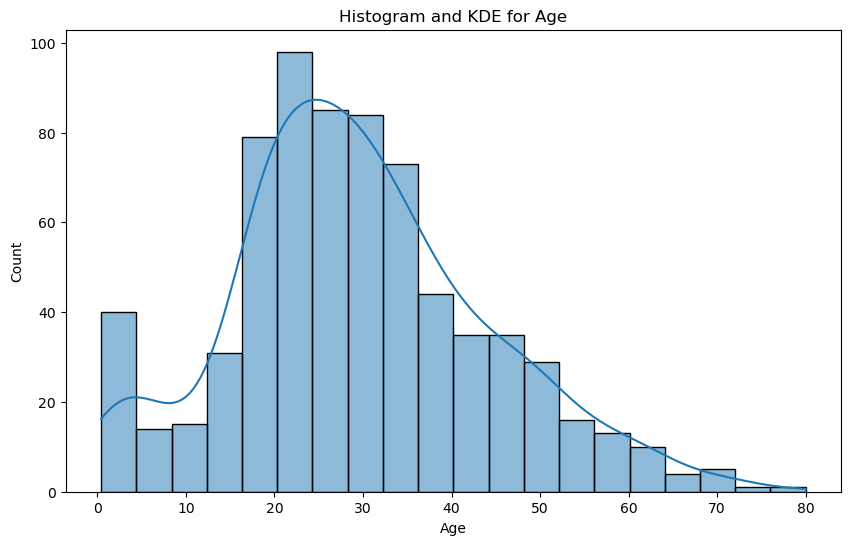

In [12]:
# Créer un histogramme et un KDE pour la variable `Age`
plt.figure(figsize=(10,6))
sns.histplot(data=data_clean, x='Age', kde=True)
plt.title("Histogram and KDE for Age")
plt.show()

3. Notre hypothèse nulle est que l'âge moyen des passagers du Titanic est égal à celui de la population en 1912 (28ans). Notre hypothèse alternative est que l'âge moyen des passagers du Titanic n'est pas de 28 ans : 

\begin{align*}
H_0 &= 28 \quad et \quad H_1\neq 28
\end{align*}

4. Nous allons utiliser un t-test car nous ne possédons pas la variance de la population. Nous utiliserons donc la formule suivante :

$$ t = \frac{\bar{X} - \mu}{s / \sqrt{n}} $$


5. Assumptions :
    L'échantillon est aléatoire, dans le sens où nous utilisons l'ensemble d'un jeux de données qui est aléatoire, et les différentes manipulations (retrait des valeurs nulles) n'en altèrent pas l'aléatoire.
    La taille de l'échantillon est de 712 passagers (largement supérieur à 30)

In [17]:
sample_mean = np.mean(data_clean['Age']) 
sample_std = np.std(data_clean['Age'], ddof=1) 
mu = 28 
n = len(data_clean['Age'])

print("L'âge moyen est de", str(sample_mean))
print("L'écart type de l'échantillon est de", str(sample_std))

L'âge moyen est de 29.64209269662921
L'écart type de l'échantillon est de 14.49293290032352


6. Nous calculons t :

In [18]:
t = (sample_mean - mu)/(sample_std / np.sqrt(n))

print("La statistique t est:", t)

La statistique t est: 3.0233009800374053


7. Cela nous permet ensuite de calculer la p-valeur. Ici, cela nous permettra de rejetter l'hypothèse nulle.

In [21]:
p_valeur = stats.t.cdf(-abs(t), df=n-1) * 2
alpha = 0.05

print("La p-valeur est:", p_valeur)

# Si p-valeur < alpha, on rejète l'hypothèse nulle
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypothèse nulle.")
    print("Statistiquement parlant, les passagers du Titanic ont un âge moyen qui n'est pas dans celui de la population.")
    
# Si p-valeur > alpha, on ne rejète pas l'hypothèse nulle
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypothèse nulle.")

La p-valeur est: 0.002590259537786662
Avec un seuil alpha 0.05 on rejette l'hypothèse nulle.
Statistiquement parlant, les passagers du Titanic ont un âge moyen qui n'est pas dans celui de la population.


8. Avec une p-value inférieure à 5%, nous possédons assez de preuve pour rejetter l'affirmation selon laquelle l'âge moyen des passagers du Titanic est la même que celui de la population mondiale en 1912. Nous allons évaluer la taille de l'effet grâce à l'équation de Cohen.

$$
d = \frac{{\bar{x}_1 - \bar{x}_2}}{{s}}
$$

In [25]:
cohens_d = (sample_mean - mu) / sample_std

interpretation = ""
if abs(cohens_d) <= 0.3:
    interpretation = "The effect size is small."
elif abs(cohens_d) <= 0.5:
    interpretation = "The effect size is medium."
else:
    interpretation = "The effect size is large."
print("Cohen's d:", cohens_d, interpretation)

Cohen's d: 0.11330299449551398 The effect size is small.



Cela indique que l'âge moyen de la population du Titanic est relativement similaire à l'âge moyen de la population mondiale.

**Q2: La survie dépend-elle de la classe du passager?**

1. Les variables d'intérêts sont Pclass et Survived. 
    Pclass est une variable qualitative ordinale
    Survived est une variable qualitative nominale

2. Nous avons choisi de représenter ces variables avec un "grouped bar chart"

In [28]:
data_clean['SurvivalStatus'] = data_clean['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Deceased')

plt.figure(figsize=(8,6))
sns.countplot(data=data_clean, x='Pclass', hue='SurvivalStatus')
plt.title('Survie des passagers par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.show()

ValueError: Could not interpret input 'Status'

<Figure size 800x600 with 0 Axes>

**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?**

**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**

Pour chacune des questions 1 à 4 ci-dessus, argumenter de manière statistique en effectuant chacune des étapes suivantes:
1. Identifier la ou les variables d'intérêt et spécifier le type.
2. Réaliser une visualisation appropriée selon la ou les variables.
3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
4. Identifier le test statistique approprié selon les hypothèses énoncées.
5. Vérifier la validation des assumptions selon le test identifié.
6. Calculer la statistique ainsi que la p-valeur.
7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
8. Interpréter le résultat et évaluer la taille de l'effet.

Quelques liens utiles pour la taille de l'effet:
* [https://rpsychologist.com/cohend/](https://rpsychologist.com/cohend/)
* [https://datatab.net/tutorial/effect-size-independent-t-test](https://datatab.net/tutorial/effect-size-independent-t-test)
* [https://www.simplypsychology.org/effect-size.html](https://www.simplypsychology.org/effect-size.html)

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

**Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

**Conclusion: Interpréter les résultats des deux analyses statistiques et résumer les points importants de votre étude.**